In [97]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

df=pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep="\t")

In [98]:
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [99]:
import statsmodels.formula.api as smf # ols 분석 시행하여 유의미한 변수를 찾음
#AGE+SEX+BMI+BP+S1+S2+S3+S4+S5+S6
formula = 'Y ~  AGE+SEX+BMI+BP+S1+S2+S3+S4+S5+S6'
result = smf.ols(formula, df).fit()
result.summary() # SEX, BMI, BP, S5
# P-value가 유의수준(0.05)보다 작은 변수를 찾음
# Kurtosis가 3에 가까우므로 정규분포와 유사하다고 판단! 
# Durbin-Watson : 2앞뒤의 갚이므로 오차상 무상관
# Cond. No. : 다중공선성이 심하지 않다 
# Adj. R-squared : 설명력 자체가 0.518 -> 이 값에 정확도가 가까우면 인정해주자.... 목표는 50.7%!
# AIC, BIC : 예측도가 크므로, 예측 능력 자체는 낮다 -> 다른 모델링이 필요하지만, 일단 Regression으로 과제 진행 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           3.83e-62
Time:                        08:36:21   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -334.5671     67.455     -4.960      0.000    -467.148    -201.986
AGE           -0.0364      0.217     -0.168      0.867      -0.463       0.390
SEX          -22.8596      5.836     -3.917      0.000     -34.330     -11.389
BMI            5.6030      0.717      7.813      0.000       4.194       7.012
BP             1.1168      0.225      4.958      0.000       0.674       1.560
S1            -1.0900      0.573     -1.901      0.058      -2.217       0.037
S2             0.7465      0.531      1.406      0.160      -0.297       1.790
S3             0.3720      0.782      0.475      0.635      -1.166       1.910
S4             6.5338      5.959      1.097      0.273      -5.178      18.245
S5            68.4831     15.670      4.370      0.000      37.685      99.282
S6             0.2801      0.273      1.025      0.306      -0.257       0.817
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                     7.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
# 1. 나이 (age): 나이 (년)
# 2. 성별 (sex): 성별
# 3. 체질량 지수 (bmi): 체질량 지수
# 4. 평균 혈압 (bp): 평균 혈압
# 5. 총 혈청 콜레스테롤 (s1): TC, 총 혈청 콜레스테롤
# 6. 저밀도 리포닛 (s2): LDL, 저밀도 리포닛
# 7. 고밀도 리포닛 (s3): HDL, 고밀도 리포닛
# 8. 총 콜레스테롤 / HDL 비율 (s4): TCH, 총 콜레스테롤 / HDL
# 9. 혈청 트리글리세라이드 (s5): LTG, 혈청 트리글리세라이드
# 10. 혈당 수치 (s6): GLU, 혈당 수치

df.corr() # Y 결괏값에 가장 영향을 미치는 요소는 bmi , s5
# s1,s2
# s3,s4

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [101]:
df.Y.describe() # 25~346.000 -> 10개로 구분 

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: Y, dtype: float64

In [102]:
df.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')

In [103]:
z = np.abs(stats.zscore(df)) # 이상치의 경우, 값을 제거 

index,_=np.where(z>2.7)
df = df[(z<=2.7).all(axis=1)]

In [104]:
feature=df[["SEX","BP","BMI","S5"]]# SEX, BMI, BP, S5
target=df[["Y"]]

(array([147., 132.,  85.,  46.]),
 array([ 25., 104., 183., 262., 341.]),
 <BarContainer object of 4 artists>)

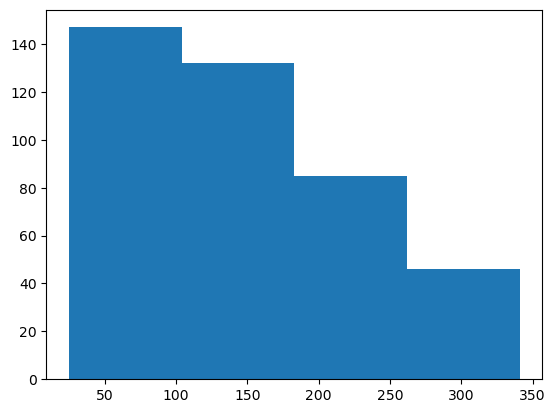

In [105]:
import matplotlib.pyplot as plt
plt.hist(df["Y"], bins=4) # bins로 Y(target)의 값을 범주화하기 위해서 bins=4로 나눔 

(array([215.,   0.,   0., 195.]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  ]),
 <BarContainer object of 4 artists>)

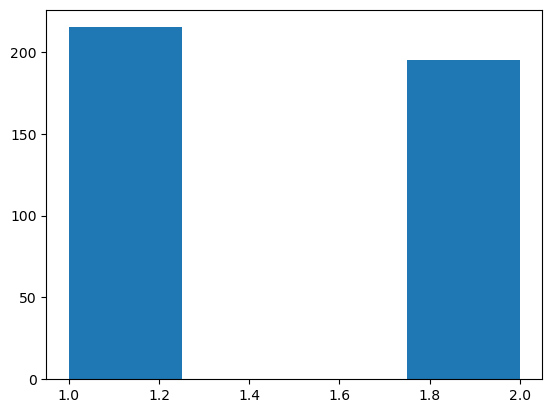

In [106]:
plt.hist(df["SEX"], bins=4) # bins로 Y(target)의 값을 범주화하기 위해서 bins=4로 나눔 

(array([ 99., 188.,  99.,  24.]),
 array([18.  , 23.05, 28.1 , 33.15, 38.2 ]),
 <BarContainer object of 4 artists>)

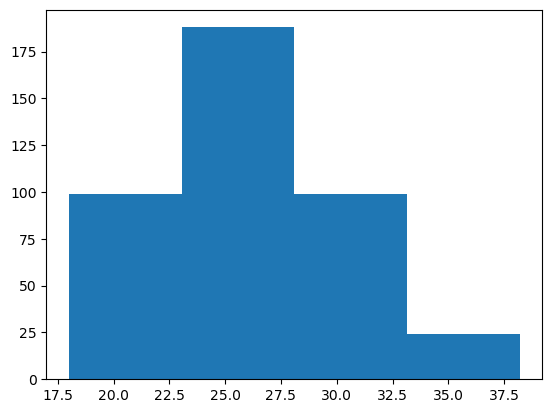

In [107]:
plt.hist(df["BMI"], bins=4) # bins로 Y(target)의 값을 범주화하기 위해서 bins=4로 나눔 

In [108]:
df["S5"]=np.sqrt(df["S5"])

C:\Users\mathn\AppData\Local\Temp\ipykernel_5244\2522750933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["S5"]=np.sqrt(df["S5"])


(array([ 24., 160., 176.,  50.]),
 array([1.80502078, 1.96401143, 2.12300209, 2.28199275, 2.44098341]),
 <BarContainer object of 4 artists>)

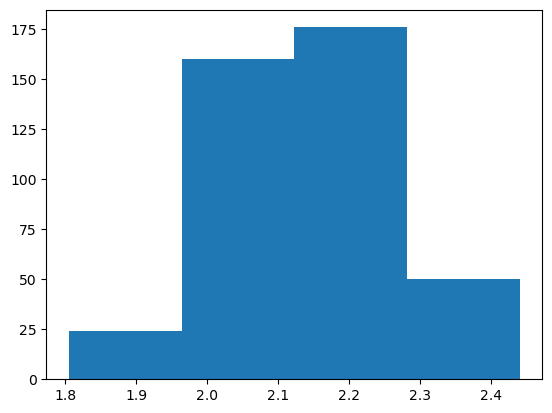

In [109]:
plt.hist(df["S5"], bins=4) # bins로 Y(target)의 값을 범주화하기 위해서 bins=4로 나눔 

In [110]:
#bins=[0,100,200,300,400]
bins=[0,104,183,262,400]
#["당뇨 진행 수치(낮음)","당뇨 진행 수치(보통)","당뇨 진행 수치(높음)","당뇨 진행 수치(매우높음)"]
#labels=[0,1,2,3]
#target=pd.cut(target['Y'], bins=bins, labels=labels, include_lowest=True, ordered=False)

In [111]:
target

,Y
0,151
1,75
2,141
3,206
4,135
...,...
436,48
437,178
438,104
439,132


In [112]:
feature.reset_index(drop=True, inplace=True)
target.reset_index(drop=True, inplace=True)

In [113]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2,random_state=60)

In [114]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
#============================================
scaler.fit(x_test)
x_test=scaler.transform(x_test)

In [115]:
from sklearn.linear_model import LinearRegression
# LinearRegression
score=dict()


for i in [True,False]:
    for j in [True,False]:
        model = LinearRegression(fit_intercept=i, positive=j)
        model.fit(x_train, y_train)
        y_pre=model.predict(x_test)
        score.setdefault((i,j),[model.score(x_train, y_train),
                                    model.score(x_test, y_test),
                                    mean_squared_error(y_test, y_pre, squared=False),
                                    mean_absolute_error(y_test, y_pre)]) 

In [116]:
print("LinearRegression 분석")
res1=max(score, key=lambda k: score[k][1])
res2=score[max(score, key=lambda k: score[k][1])]
print(f"fit_intercept: {res1[0]}")
print(f"positive : {res1[1]}일 때 최고의 test score 기록!★")
print(f"train score : {res2[0]}")
print(f"R^2 Score : {res2[1]} <- 이쪽이 포인트!♥")
print(f"RMSE : {res2[2]}")
print(f"MAE : {res2[3]}")

LinearRegression 분석
fit_intercept: True
positive : False일 때 최고의 test score 기록!★
train score : 0.4411170798888683
R^2 Score : 0.5162879710539429 <- 이쪽이 포인트!♥
RMSE : 53.18190975452863
MAE : 44.805283429852


In [117]:
# KNeighborRegressor
score=dict()


for i in range(1,30):
    for j in ['uniform','distance']:
        for s in ['auto','ball_tree','kd_tree','brute']:
            model = KNeighborsRegressor(n_neighbors=i, weights=j, algorithm=s)
            model.fit(x_train, y_train)
            y_pre=model.predict(x_test)
            score.setdefault((i,j,s),[model.score(x_train, y_train),
                                      model.score(x_test, y_test),
                                      mean_squared_error(y_test, y_pre, squared=False),
                                      mean_absolute_error(y_test, y_pre)]) 

In [118]:
print("KNeighborRegressor 분석")
res1=max(score, key=lambda k: score[k][1])
res2=score[max(score, key=lambda k: score[k][1])]
print(f"n_neighbors : {res1[0]}")
print(f"weights : {res1[1]}")
print(f"algorithm : {res1[2]} 일 때 최고의 test score 기록!★")
print(f"train score : {res2[0]}")
print(f"R^2 Score : {res2[1]} <- 이쪽이 포인트!♥")
print(f"RMSE : {res2[2]}")
print(f"MAE : {res2[3]}")

KNeighborRegressor 분석
n_neighbors : 28
weights : distance
algorithm : auto 일 때 최고의 test score 기록!★
train score : 1.0
R^2 Score : 0.5249147630642317 <- 이쪽이 포인트!♥
RMSE : 52.70553820507169
MAE : 45.1236834241567


In [119]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
# SVR
score=dict()


for i in range(1,7):
    for j in ['linear', 'poly', 'rbf', 'sigmoid']:
        for s in ['scale','auto']:
            model = SVR(kernel=j, degree=i, gamma=s, C=1.0, epsilon=0.2)
            model.fit(x_train, y_train)
            y_pre=model.predict(x_test)
            score.setdefault((i,j,s),[model.score(x_train, y_train),
                                      model.score(x_test, y_test),
                                      mean_squared_error(y_test, y_pre, squared=False),
                                      mean_absolute_error(y_test, y_pre)]) 

c:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

In [120]:
print("SVR 분석")
res1=max(score, key=lambda k: score[k][1])
res2=score[max(score, key=lambda k: score[k][1])]
print(f"Degree : {res1[0]}")
print(f"Kernel : {res1[1]}")
print(f"Gamma : {res1[2]} 일 때 최고의 test score 기록!★")
print(f"train score : {res2[0]}")
print(f"R^2 Score : {res2[1]} <- 이쪽이 포인트!♥")
print(f"RMSE : {res2[2]}")
print(f"MAE : {res2[3]}")

SVR 분석
Degree : 1
Kernel : linear
Gamma : scale 일 때 최고의 test score 기록!★
train score : 0.4389486607056252
R^2 Score : 0.5146789767269451 <- 이쪽이 포인트!♥
RMSE : 53.270287079979596
MAE : 44.741341273159286


1. LinearRegression : 52.6%       
2. KNeighborRegression : 58.5%    <- 이게 제일 높다    
3. SVC : 52.3%     
=> 최종결론 : Regression만으로는 한계가 있다.    